# Mesa scale-free networks example - Barabási-Albert model

## Description

Small-world networks accord with some empirically observed properties of social networks. However, unlike small-world networks, many real-world networks have been observed to have scale-free properties such that some small number of individuals are very highly connected, while most are not.

Systems as diverse as genetic networks or the World Wide Web are best described as networks with complex topology.
A common property of many large networks is that the vertex connectivities follow a scale-free power-law distribution.

This feature was found to be a consequence of two generic mechanisms: 
1. Networks expand continuously by the addition of new vertices
2. New vertices attach preferentially to sites that are already well connected.

The development of large networks is governed by robust self-organizing phenomena that go beyond the particulars of the individual systems.

## Model

We want to show that, independent of the system and the identity of its constituents, the discribution degree  P(k) - probability that a vertex in the network interacts with k other vertices decays as a power law (remember the binomial degree distribution)
This result indicates that large networks self-organize into a scale-free state, a feature unpredicted by all existing random network models.

A common feature of the Erno-Renyi and Watts-Strogatz models is that the probability of finding a highly connected vertex (that is, a large k) decreases exponentially with k; thus, vertices with large connectivity are practically absent.

In contrast, the power-law tail characterizing P(k) for the networks studied indicates that highly connected (large k) vertices have a large chance of occurring, dominating the connectivity.

We use two key features of real-world networks that are responsible for the power-law scaling observed
1. Growth
2. Preferential attachment

### Growth

In contrast, most real world networks are open and they form by the continuous addition of new vertices to the system, thus the number of vertices N increases throughout the lifetime of the network. For example, the actor network grows by the addition of new actors to the system, the WWW grows exponentially over time by the addition of new Web pages (8), and the research literature constantly grows by the publication of new papers.
Common feature of these systems is that the network continuously expands by the addition of new vertices that are connected to the vertices already present in the system.

### Preferential attachment

A new actor is most likely to be cast in a supporting role with more established and better-known ac- tors. Consequently, the probability that a new actor will be cast with an established one is much higher than that the new actor will be cast with other less-known actors. Similarly, a newly created Web page will be more likely to include links to well-known popular doc- uments with already-high connectivity, and a new manuscript is more likely to cite a well- known and thus much-cited paper than its less-cited and consequently less-known peer.

These examples indicate that the probability with which a new vertex connects to the existing vertices is not uniform; there is a higher probability that it will be linked to a vertex that already has a large number of connections.

# Barabási–Albert model algorithm

We now look at networks generated according to the Barabási–Albert preferential-attachment model (Barabási and Albert, 1999).

1. The algorithm begins with a connected network of m individual, starting with a small number (m0) of vertices.
2. New nodes (up to N ) are added one at a time. To incorporate the growing character of the network, at every time step we add a new vertex with m (<= m0) edges that link the new vertex to m different vertices already present in the system.
3. Each new node connects to m existing nodes with probability directly proportional to the number of links the nodes already have. To incorporate preferential attachment, we assume that the probability M that a new vertex will be connected to vertex i depends on the connectivity k i of that vertex.
4. Therefore, existing nodes with many links tend to receive more new attachments, e.g., new articles are proportionally more likely to cite ‘famous’ (already heavily cited) articles rather than newer articles with fewer citations.

After t time steps, the model leads to a random network with t+m0 vertices and mt edges. This network evolves into a scale-invariant state with the probability that a vertex has k edges, following a power law with an exponent 2.9 +/- 0.1

# 1. Create the Basic Agent/Model

## Setting up the model

To begin writing the model code, we start with two core classes: one for
the overall model, the other for the agents. The model class holds the
model-level attributes, manages the agents, and generally handles the
global level of our model. Each instantiation of the model class will be
a specific model run. Each model will contain multiple agents, all of
which are instantiations of the agent class. Both the model and agent
classes are child classes of Mesa’s generic ``Model`` and ``Agent``
classes.

In [1]:
from mesa import Model, Agent
from mesa.time import RandomActivation

In [2]:
class ScaleFreeAgent(Agent):
    
    def __init__(self, unique_id, model):
        '''
         Create a new bounded confidence agent.

         Args:
            unique_id: Unique identifier for the agent
        '''
        
        super().__init__(unique_id, model)
        
    def step(self):
        '''
        Run one step of the agent.
        '''
        
        pass


## Adding space

Let’s add a simple spatial element to our model by putting our agents on a grid.

Mesa has a special type of a grid called NetworkGrid, where agents can be placed in custom network constalation you can create.

`from mesa.space import NetworkGrid`

We instantiate a network grid with networkx package, specifically `nx.barabasi_albert_graph`, which takes parameters n and m. 
It returns a random graph using Barabási–Albert preferential attachment. 
Under the hood, a graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

**Note: If you are interested in using *Vertex copy model* from the lectures, please use `nx.gnc_graph(n)`, which obviously takes only the parameter n - total number of nodes in the model.**

**Note: If you would like to update the network graph (for example in the step function of your Agent or Model - in your projects) you would have to use the methods `model.G.add_node()` and `model.G.add_edge()`, and make sure you apply the attachement algorithm manually yourself. But this reasoning is probably out of scope for this course, since most of the behavior of such interconnected nodes in the graph can be explored with a generated graph.**


In [3]:
import networkx as nx
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector

class ScaleFreeModel(Model):
    
    def __init__(self, N, m):
        '''
        Create a new bounded confidence model.

         Args:
            N: how many agents the model contains
        '''
        
        super().__init__()
        
        # 1 Initialization
        self.num_agents = N
        self.m = m
        
        self.G = nx.barabasi_albert_graph(self.num_agents, m)
        self.grid = NetworkGrid(self.G)
        
        self.datacollector = DataCollector(
            model_reporters={"m": "m"}
        )
        
        # 2 Create agents
        
        for i in range(self.num_agents):
            a = ScaleFreeAgent(i, self)
            self.grid.place_agent(a, i)

    def step(self):
        '''
        Run one step of the model. If All agents are happy, halt the model.
        '''
        
        pass

# 2. Run the Agent/Model Basic

### Running the model

At this point, we have a model which runs. 
You can see for yourself with a few easy lines. If you’ve been working in an jupyter notebook session, you can create a model object directly. 

With that last piece in hand, it’s time for the first rudimentary run of the model.

Now let’s create a model with 100 agents
There is no need to run the model, since there are no steps to run.

In [15]:
model = ScaleFreeModel(100, 5)

# 3. Visualize the Network

Let's visualize a small Barabasi-Albert network graph with an average node degree parameter 5 (as used in the original paper - Barabási and Albert (1999)

In [5]:
from mesa.visualization.ModularVisualization import ModularServer
from mesa.visualization.UserParam import UserSettableParameter
from mesa.visualization.modules import ChartModule
from mesa.visualization.modules import NetworkModule
from mesa.visualization.modules import TextElement

def network_portrayal(G):
# The model ensures there is always 1 agent per node

    betweenness_centrality = dict(nx.betweenness_centrality(G))
    
    def node_color(agent, n_id):
        #return '#008000'
        return "rgba("+ str(betweenness_centrality[n_id] * 10 * 256) +",128,128,1.0)"
    
    def edge_color(agent1, agent2):
        return '#e8e8e8'
    
    def edge_width(agent1, agent2):
        return 2
    
    portrayal = dict()
    
    portrayal['nodes'] = [{'id': n_id,
                        'agent_id': n['agent'][0].unique_id,
                        'size': 2,
                        'color': node_color(n['agent'][0], n_id),
                        }
                        for n_id, n in G.nodes(data=True)]
    
    portrayal['edges'] = [{'id': i,
                        'source': source,
                        'target': target,
                        'color': edge_color(G.nodes[source]['agent'][0], G.nodes[target]['agent'][0]),
                        'width': edge_width(G.nodes[source]['agent'][0], G.nodes[target]['agent'][0]),
                        }
                        for i, (source, target, _) in enumerate(G.edges(data=True))]
    
    return portrayal

network = NetworkModule(network_portrayal, 800, 800, library='d3')
chart = ChartModule([{'Label': 'Agent', 'Color': '#008000'}])

class Density(TextElement):
    def render(self, model):
        Density = nx.density(model.G)
        return 'Density: ' + str(Density)

text = Density()

model_params = {
    'N': UserSettableParameter('slider', 'Number of agents', 10, 10, 200, 10,
    description='Choose how many agents to include in the model'),
    'm': UserSettableParameter('slider', 'Avg Node Degree', 3, 3, 5, 1,
    description='Avg Node Degree'),
    }

server = ModularServer(ScaleFreeModel, [network, chart, text], 'Barabasi-Albert Model', model_params)

# 4. Run the Network Visualization

NOTE: Runtime server error is normal and expected when running visualization code below. This visualization code was made for command line execution (not explicitly for Jupyter Notebooks), so we are **forcing** it's use.

Just make sure to increment the port number counter each visualization run, to be able to use it.

In [6]:
server.port = 8521 # The default 8521 - increase the counter as you run the visalizations
#server.launch() # Uncomment to run the visalization

# 5. Collect data to Analyze the Network

In [7]:
print('Number of agents {}'.format(model.G.number_of_nodes()))
print('Number of edges {}'.format(model.G.number_of_edges()))
print('Number of edges {}'.format(nx.info(model.G)))

print('Density {}'.format(nx.density(model.G)))
print('Number of selfloop edges {}'.format(nx.number_of_selfloops(model.G)))
print('Frequency of each degree value {}'.format(nx.degree_histogram(model.G))) # The degree values are the index in the list.

Number of agents 10000
Number of edges 49975
Number of edges Graph with 10000 nodes and 49975 edges
Density 0.0009995999599959997
Number of selfloop edges 0
Frequency of each degree value [0, 0, 0, 0, 0, 2878, 1753, 1164, 859, 621, 460, 353, 264, 219, 194, 145, 114, 95, 90, 86, 67, 56, 42, 52, 25, 31, 28, 20, 24, 17, 15, 17, 18, 20, 8, 18, 13, 8, 9, 12, 9, 13, 8, 7, 15, 5, 7, 6, 4, 6, 11, 4, 4, 5, 6, 4, 2, 3, 4, 1, 1, 2, 1, 3, 2, 4, 1, 3, 0, 1, 1, 3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

# 6. Run the Agent/Model Analysis

## Question 1

1.1 Plot a graph of degrees for all nodes in the network model.

1.2 As network grows with newly added nodes (old nodes having lower index values starting with zero, and newly added nodes having higher index values), explain the growth behavior that you observe on the plot?

1.3 For the last-added node with an index value of 99 (in the example model with 100 nodes), retrieve its neighbours and plot a histogram of the degrees of those neighbours.

1.4 To which neighbours and why did that last node attach itself to?

<AxesSubplot:>

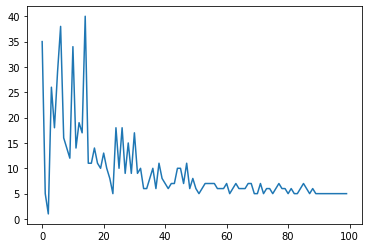

In [16]:
# Answer 1.1 [Your code here]

degree_per_node = dict(model.G.degree(model.G))

import pandas as pd
data = pd.Series(degree_per_node)
data.plot()
#data.plot( logx=True, logy=True)

<AxesSubplot:>

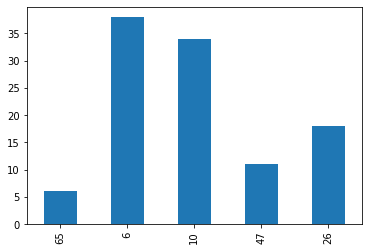

In [17]:
# Answer 1.3 [Your code here]

last_node_index = model.G.number_of_nodes() - 1
degree_per_neighbour = dict(model.G.degree(list(nx.neighbors(model.G, last_node_index))))

data = pd.Series(degree_per_neighbour)
data.plot.bar()

## Answer 1.2 and 1.4

[Your text answer here]

The growth and prefered attachement

## Question 2

2.1 Plot the log log degree distribution for a network with 10k nodes (you need to create another nework model with increased size).

2.2 Explain the graph?

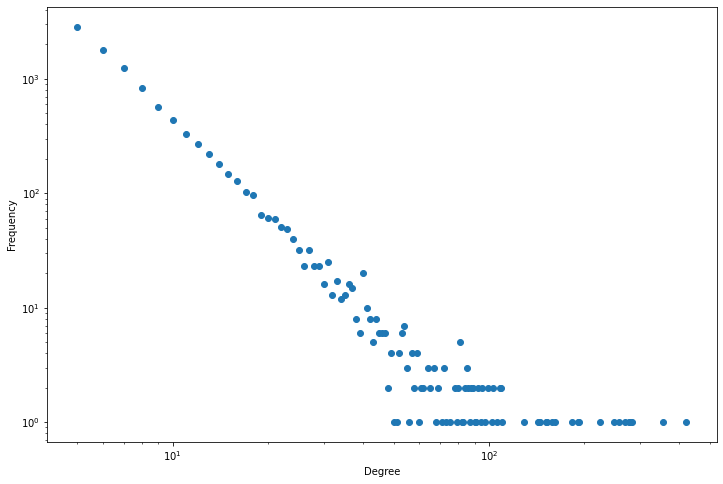

In [19]:
# Answer 2.1 [Your code here]

import matplotlib.pyplot as plt
%matplotlib inline

model = ScaleFreeModel(10000, 5)

degree_freq = nx.degree_histogram(model.G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
#plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.xscale('log') 
plt.ylabel('Frequency')
plt.yscale('log')   
plt.scatter(degrees[model.m:], degree_freq[model.m:])  

## Answer 2.2

[Your text answer here]

## Question 3

3.1 Plot the log log degree distribution for the newtorks of a few different sizes (t=10k, t=100k, t=1Million).

3.3 Explain how a stable degree distribution for these few networks regardless of their size relate to the scale-free behavior?

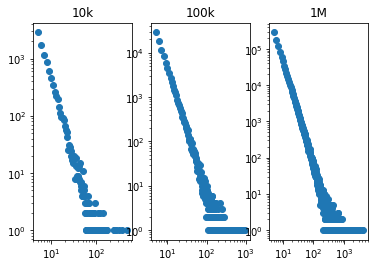

In [11]:
# Answer 3.1 [Your code here]

figure, axis = plt.subplots(1, 3)

axis[0].scatter(degrees[model.m:], degree_freq[model.m:]) 
axis[0].set_title("10k")
axis[0].set_xscale('log')
axis[0].set_yscale('log')

model = ScaleFreeModel(100000, 5)
degree_freq = nx.degree_histogram(model.G)
degrees = range(len(degree_freq))

axis[1].scatter(degrees[model.m:], degree_freq[model.m:]) 
axis[1].set_title("100k")
axis[1].set_xscale('log')
axis[1].set_yscale('log')

model = ScaleFreeModel(1000000, 5)
degree_freq = nx.degree_histogram(model.G)
degrees = range(len(degree_freq))

axis[2].scatter(degrees[model.m:], degree_freq[model.m:]) 
axis[2].set_title("1M")
axis[2].set_xscale('log')
axis[2].set_yscale('log')

## Answer 3.3

[Your text answer here]